# TASK 2-Linear Regression

# Simple Linear Regression

> In this regression task we understand linear relationship between
precentage(marks) and study_hours. Then we will predict the precentage 
of marks that a student is expected to score based upon the number of study hours. 
It is a linear problem because it has only training data of one feature. 

## Importing the libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the dataset

In [3]:
data = pd.read_csv("http://bit.ly/w-data")
print("Data is online imported successfully")
data.head()

Data is online imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Plotting this data 
### 2D plot

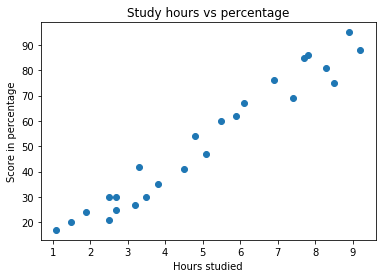

In [5]:
plt.scatter(data["Hours"],data["Scores"])
plt.title("Study hours vs percentage")
plt.xlabel("Hours studied")
plt.ylabel("Score in percentage")
plt.show()

> By help of Seaborn Library we can see scatter points as well as regression line

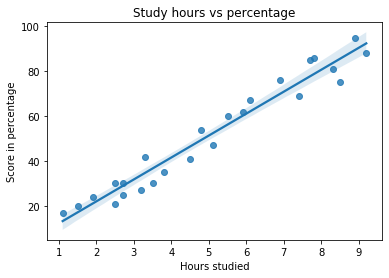

In [6]:
sns.regplot(x = "Hours",y = "Scores",data = data)
plt.title("Study hours vs percentage")
plt.xlabel("Hours studied")
plt.ylabel("Score in percentage")
plt.show()


> Now it is clear that there is a linear relation between these 2 features.

## Preparing the data

#### In first, check if any nan value is existing

In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

#### Now prepare the data or split into predictor and target variables

In [9]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

## Now splitting data into training data and validation data

In [123]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.2,random_state = 10)

## Now import simple linear regression model and train on this training data

In [124]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### score of regression model on training data and validation data





In [125]:
linear_reg.score(x_train, y_train)

0.95807022445042

In [126]:
linear_reg.score(x_valid,y_valid)

0.6683995499740194

### Visualising score on training data and validation data

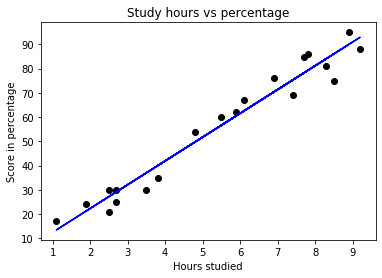

In [127]:
plt.scatter(x_train,y_train,color = "black")
plt.plot(x_train,linear_reg.predict(x_train),color = "blue")
plt.title("Study hours vs percentage")
plt.xlabel("Hours studied")
plt.ylabel("Score in percentage")
plt.show()

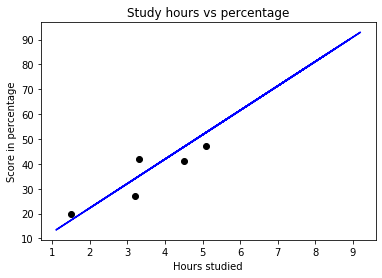

In [128]:
plt.scatter(x_valid,y_valid,color = "black")
plt.plot(x_train,linear_reg.predict(x_train),color = "blue")
plt.title("Study hours vs percentage")
plt.xlabel("Hours studied")
plt.ylabel("Score in percentage")
plt.show()

### Comparing validation data and prediction on that

In [129]:
y_predict = linear_reg.predict(x_valid)
compare_data = pd.DataFrame({"Target_Actual":y_valid,"Target_predicted":y_predict})
compare_data

,Target_Actual,Target_predicted
0,20,17.371423
1,47,52.702923
2,42,35.037173
3,27,34.055743
4,41,46.814340


### Now Predicting for given study hours

In [137]:
study_hours = 9.25
predicted_marks = linear_reg.predict([[study_hours]])
print("given study hours: %0.2f"%(study_hours))
print("predicted precentage marks: %0.2f"%(predicted_marks))

given study hours: 9.25
predicted precentage marks: 93.43
